['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'apple', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'toilet', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush', 'headphones', 'mobile phone']


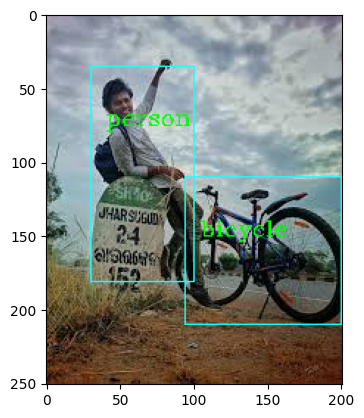

In [2]:
import cv2
import numpy as np


import matplotlib.pyplot as plt

config_file="C:\\Users\\vishn\\OneDrive\\Desktop\\mini_project\\config.pbtxt"
frozen_model="C:\\Users\\vishn\\OneDrive\\Desktop\\mini_project\\frozen_inference_graph.pb"

model=cv2.dnn_DetectionModel(frozen_model,config_file)

classLabels=[]
file_name="C:\\Users\\vishn\\OneDrive\\Desktop\\mini_project\\labels.names"
with open(file_name,'rt') as fpt:
     classLabels = fpt.read().rstrip('\n').split('\n')
        
print(classLabels)



img= cv2.imread("C:\\Users\\vishn\\OneDrive\\Desktop\\mini_project\\img\\bycyle.jpg")

model.setInputSize(320,320)
model.setInputScale(1.0/127.5)
model.setInputMean((127.5,127.5,127.5))
model.setInputSwapRB(True)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))


ClassIndex, confidence, bbox=model.detect(img,confThreshold=0.5)


font_scale = 0.5
font = cv2.FONT_HERSHEY_COMPLEX  # Stylish font

# Assuming bbox contains (x, y, w, h) coordinates
for ClassInd, conf, box in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
    x, y, w, h = box  # Unpacking box coordinates
    # Green box with thinner border
    cv2.rectangle(img, (x, y), (x + w, y + h), (255, 255, 25), thickness=1)  # Green border, thickness=1
    # Text with new color and style
    cv2.putText(img, classLabels[ClassInd - 1], (x + 10, y + 40), font, 
                fontScale=font_scale, color=(0, 255, 0), thickness=1) 
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))





In [ ]:
import cv2

# Load model and class labels (ensure these are defined)
# model = <Load your detection model>
# classLabels = <List of class labels>

cap = cv2.VideoCapture("C:\\Users\\vishn\\OneDrive\\Desktop\\mini_project\\video\\Road traffic video for object recognition.mp4")
if not cap.isOpened():
    cap = cv2.VideoCapture(0)  # Fallback to webcam if video cannot be loaded
if not cap.isOpened():
    raise IOError("Cannot open video source")

# Initialize font parameters
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN

while True:
    ret, frame = cap.read()
    if not ret:
        print("Failed to capture frame. Exiting...")
        break

    # Object detection
    try:
        ClassIndex, confidence, bbox = model.detect(frame, confThreshold=0.55)
    except Exception as e:
        print(f"Detection error: {e}")
        continue

    # Draw bounding boxes
    if len(ClassIndex) != 0:
        for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
            if ClassInd <= 80:
                x, y, w, h = boxes
                cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2)
                cv2.putText(frame, classLabels[ClassInd - 1], (x + 10, y + 40),
                            font, fontScale=font_scale, color=(0, 255, 0), thickness=3)

    # Display the frame
    cv2.imshow("Object Detection", frame)

    # Exit on pressing 'q'
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()
